In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'embeddingsdata - Copy.xlsx')
df.head()

,Label,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,...,-0.045697,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309
1,0,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,...,-0.056834,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062
2,0,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,...,-0.016249,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289
3,0,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,...,-0.038879,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540
4,0,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,...,-0.042079,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 769 entries, Label to embed_767
dtypes: float64(768), int64(1)
memory usage: 5.3 MB


In [5]:
df.describe()

,Label,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.751111,0.008983,-0.025840,0.026057,0.044410,0.000759,0.013850,-0.059033,0.038857,0.034926,...,-0.033964,0.001379,-0.020182,-0.051826,0.020040,0.037724,0.020917,0.012222,-0.018116,-0.020047
std,2.444546,0.013080,0.014345,0.012180,0.012642,0.012814,0.011169,0.009884,0.009770,0.012038,...,0.012178,0.011610,0.010045,0.011161,0.011081,0.010076,0.010277,0.011059,0.011709,0.010896
min,0.000000,-0.039358,-0.084908,-0.007233,0.007033,-0.055765,-0.028051,-0.086373,0.004234,-0.005650,...,-0.074209,-0.051135,-0.050940,-0.083101,-0.012383,0.005104,-0.012658,-0.030215,-0.052673,-0.049920
25%,0.000000,-0.000027,-0.034862,0.017528,0.036387,-0.007764,0.007289,-0.065763,0.032636,0.026667,...,-0.042259,-0.006315,-0.026980,-0.060003,0.012729,0.031493,0.014332,0.004693,-0.026373,-0.027255
50%,1.000000,0.009184,-0.026009,0.025705,0.044498,0.000951,0.014360,-0.059843,0.038992,0.035213,...,-0.033778,0.002049,-0.020128,-0.052381,0.020137,0.037664,0.021242,0.012172,-0.018876,-0.020307
75%,2.000000,0.018332,-0.016397,0.034142,0.052540,0.009654,0.021493,-0.052747,0.045889,0.043000,...,-0.025644,0.008861,-0.013172,-0.044269,0.026860,0.044129,0.027501,0.019967,-0.010427,-0.012180
max,10.000000,0.058404,0.013274,0.066939,0.083282,0.034851,0.046588,-0.027718,0.066988,0.071390,...,0.000070,0.038822,0.008411,-0.017419,0.060821,0.073698,0.051190,0.044975,0.025080,0.033281


In [8]:
df['Label'].nunique()

11

## A1

Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['Label', 'embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4',
       'embed_5', 'embed_6', 'embed_7', 'embed_8',
       ...
       'embed_758', 'embed_759', 'embed_760', 'embed_761', 'embed_762',
       'embed_763', 'embed_764', 'embed_765', 'embed_766', 'embed_767'],
      dtype='object', length=769)

In [7]:
X = df[df.columns[1:]]
y = df['Label']

In [8]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = np.concatenate((X_train, X_test), axis=0)

In [11]:
y = np.concatenate((y_train, y_test), axis=0)

### k = 3

In [12]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print(cluster_labels)

C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 1 0 0 0 1 1 0 0 0 1 2 0 0 1 0 1 0 0 2 0 0 0 0 0 2 1 1 0 1 0 0 0 2 0 0
 1 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 0 1 1 2 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 2 1
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 2 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 2 1 0 2 1 0 0 2 0 0 0 0 0 1 0 0 2 1 1 1 0 1 0 0 0 1 2 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 2 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 2 0 0 1 1 1 0 0 0 1 2 0 1 0 2 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 2 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 2 1 1 0 1 0 2 2 0 0 0 0 2 1 0 0 0 0 0
 0 1 0 1 2 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 2 2 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 1 0 0 1 0
 0 1 0 0 2 0 0 1 0 1 0 2 

### k = 5

In [13]:
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print(cluster_labels)

C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[4 2 1 3 3 4 3 1 3 2 3 1 0 2 4 1 2 1 3 3 0 4 3 2 3 3 0 4 1 2 1 2 3 2 0 4 4
 1 4 4 3 4 4 2 1 4 3 0 4 4 2 4 2 4 1 1 0 4 1 3 1 1 4 4 1 2 1 1 1 4 1 2 0 1
 4 1 2 3 2 1 3 2 3 4 4 1 2 2 3 3 1 1 1 0 2 4 3 2 3 3 4 1 4 3 1 2 3 2 2 1 2
 4 4 1 1 4 3 2 1 3 2 1 4 1 3 1 4 4 1 4 4 0 3 2 1 1 1 4 4 3 2 2 4 2 2 4 1 4
 0 1 2 0 1 3 3 0 2 4 2 4 4 4 2 2 0 1 2 4 3 1 4 3 2 1 0 1 2 3 2 3 2 1 3 4 4
 1 4 1 4 2 1 3 1 3 3 1 3 4 2 3 1 0 2 1 3 1 4 4 3 3 2 4 3 1 3 4 1 4 1 4 3 2
 3 1 3 3 4 2 0 2 3 2 1 3 4 4 4 1 0 4 2 4 0 2 1 4 4 2 3 3 2 1 4 2 3 4 3 2 1
 1 4 4 1 4 3 2 2 3 2 3 1 4 4 3 2 3 4 1 3 3 0 3 3 1 4 1 3 4 2 3 3 1 4 2 3 4
 4 1 1 2 3 4 4 0 3 3 1 4 1 2 4 4 1 0 2 1 4 0 4 3 1 4 3 1 3 1 3 4 2 2 2 1 3
 2 2 0 1 3 3 2 1 4 1 1 4 3 1 4 2 4 1 0 4 1 4 1 2 0 0 2 4 2 2 0 1 4 2 3 4 3
 4 3 3 1 0 3 2 2 1 1 2 1 2 3 1 2 2 1 4 3 1 1 4 3 4 1 2 2 0 0 3 4 3 2 1 4 1
 2 4 1 3 4 3 4 1 1 3 2 2 4 2 0 1 4 2 1 3 4 4 4 4 4 2 4 1 4 3 4 2 1 4 3 1 1
 2 4 1 3 2 2 2 4 3 1 3 3 2 4 3 3 3 4 4 4 4 2 2 4 3 2 4 1 2 4 0 1 1 4 4 1 3
 4 1 4 3 0 4 4 1 2 1 3 0 

## A2

C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pranav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

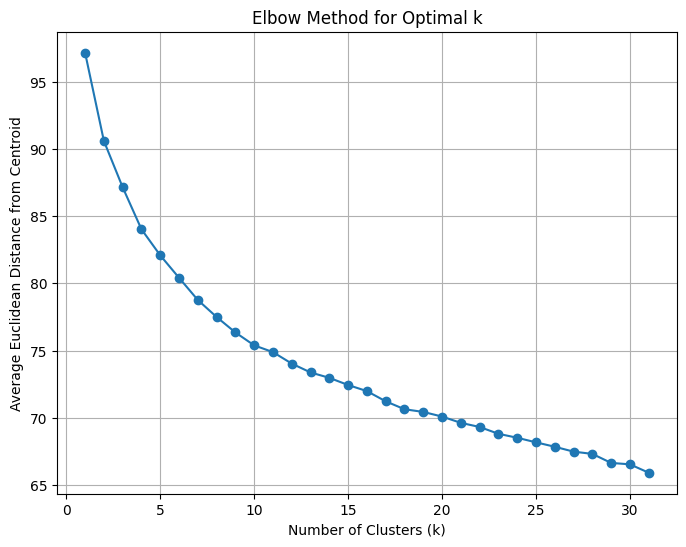

In [14]:
k_values = range(1, 32)
distortions = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_) 

plt.figure(figsize=(8, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance from Centroid')
plt.grid(True)
plt.show()

## A3

Use AgglomerativeClusteringfor hierarchical clustering of your data. Plot the dendrogram to visualize the clusters.

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

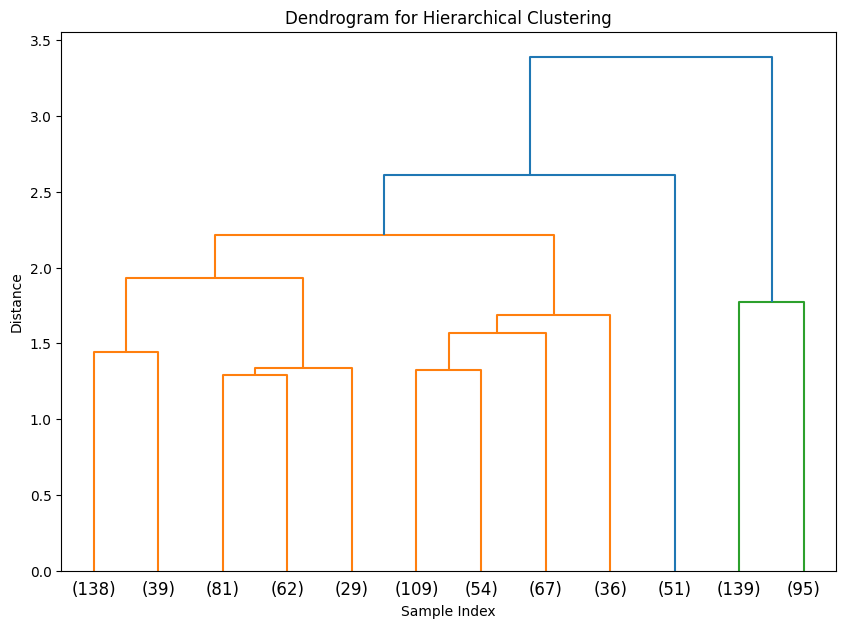

In [16]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)

linked = linkage(X, method='ward')  
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## A4

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

## A5

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
pca.fit(X)

PCA()

In [20]:
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
variance_captured = cumulative_var_ratio[n_components - 1]

print(f"Number of components needed to capture 95% variance: {n_components}")
print(f"Variance captured by {n_components} components: {variance_captured:.4f}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

Number of components needed to capture 95% variance: 189
Variance captured by 189 components: 0.9503


## A6

In [21]:
pca = PCA()
pca.fit(X_train)

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

LogisticRegression()

In [25]:
accuracy = classifier.score(X_test_pca, y_test)
print(f"Accuracy using the transformed dataset: {accuracy:.4f}")

Accuracy using the transformed dataset: 0.6259


#### This code is written only by Prabhav Ravi Tammanashastri